In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import multilabel_confusion_matrix
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.models import load_model

In [8]:
actions = ['head', 'shoulder', 'knee', 'clap', 'left_foot', 'right_foot', 'both_foot', 'yeah']

In [2]:
data = np.concatenate([np.load('dataset/seq_head_1673312096.npy'),
                       np.load('dataset/seq_head_1673312167.npy'),
                       np.load('dataset/seq_head_1673312288.npy'),
                       np.load('dataset/seq_head_1673312438.npy'),
                       np.load('dataset/seq_head_1673312530.npy'),  # head
                       np.load('dataset/seq_shoulder_1673312611.npy'),
                       np.load('dataset/seq_shoulder_1673312744.npy'),
                       np.load('dataset/seq_shoulder_1673312847.npy'),
                       np.load('dataset/seq_shoulder_1673312953.npy'),
                       np.load('dataset/seq_shoulder_1673313045.npy'),  # shoulder
                       np.load('dataset/seq_knee_1673313191.npy'),
                       np.load('dataset/seq_knee_1673313291.npy'),
                       np.load('dataset/seq_knee_1673313461.npy'),
                       np.load('dataset/seq_knee_1673313562.npy'),
                       np.load('dataset/seq_knee_1673313657.npy'),  # knee
                       np.load('dataset/seq_clap_1673313729.npy'),
                       np.load('dataset/seq_clap_1673313791.npy'),
                       np.load('dataset/seq_clap_1673313994.npy'),
                       np.load('dataset/seq_clap_1673314088.npy'),
                       np.load('dataset/seq_clap_1673313890.npy'),  # clap
                       np.load('dataset/seq_left_foot_1673314180.npy'),
                       np.load('dataset/seq_left_foot_1673314271.npy'),
                       np.load('dataset/seq_left_foot_1673314375.npy'),
                       np.load('dataset/seq_left_foot_1673314480.npy'),
                       np.load('dataset/seq_left_foot_1673314567.npy'),  # left_foot
                       np.load('dataset/seq_right_foot_1673314639.npy'),
                       np.load('dataset/seq_right_foot_1673314731.npy'),
                       np.load('dataset/seq_right_foot_1673314993.npy'),
                       np.load('dataset/seq_right_foot_1673315098.npy'),  # right_foot
                       np.load('dataset/seq_both_foot_1673315178.npy'),
                       np.load('dataset/seq_both_foot_1673315271.npy'),
                       np.load('dataset/seq_both_foot_1673315384.npy'),
                       np.load('dataset/seq_both_foot_1673315499.npy'),
                       np.load('dataset/seq_both_foot_1673315586.npy'),  # both_foot
                       np.load('dataset/seq_yeah_1673315644.npy'),
                       np.load('dataset/seq_yeah_1673315733.npy'),
                       np.load('dataset/seq_yeah_1673315848.npy'),
                       np.load('dataset/seq_yeah_1673315961.npy'),
                       np.load('dataset/seq_yeah_1673316050.npy'),  # yeah
                       ], axis=0)

In [3]:
data.shape

(35967, 30, 149)

In [4]:
x_data = data[:, :, :-1]
labels = data[:, 0, -1]

In [5]:
print(x_data.shape)
print(labels.shape)

(35967, 30, 148)
(35967,)


In [6]:
labels

array([0., 0., 0., ..., 7., 7., 7.])

In [9]:
y_data = to_categorical(labels, num_classes=len(actions))

In [10]:
y_data

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [14]:
x_data = x_data.astype(np.float32)
y_data = y_data.astype(np.float32)

x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.2, stratify = y_data, random_state=2021)

In [15]:
print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

(28773, 30, 148) (28773, 8)
(7194, 30, 148) (7194, 8)


In [16]:
model = Sequential([LSTM(64, activation='relu', input_shape=x_train.shape[1:3]),
                    Dense(32, activation='relu'),
                    Dense(len(actions), activation='softmax')])

In [17]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                54528     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 8)                 264       
                                                                 
Total params: 56,872
Trainable params: 56,872
Non-trainable params: 0
_________________________________________________________________


In [18]:
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=15,
                    callbacks=[ModelCheckpoint('models/model.h5', monitor='val_acc', verbose=1, save_best_only=True, mode='auto'),
                               ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=50, verbose=1, mode='auto')])

Epoch 1/15
899/900 [============================>.] - ETA: 0s - loss: 10.0928 - acc: 0.4040
Epoch 1: val_acc improved from -inf to 0.63664, saving model to models\model.h5
900/900 [==============================] - 20s 18ms/step - loss: 10.0913 - acc: 0.4041 - val_loss: 0.9861 - val_acc: 0.6366 - lr: 0.0010
Epoch 2/15
898/900 [============================>.] - ETA: 0s - loss: 0.9864 - acc: 0.6645
Epoch 2: val_acc did not improve from 0.63664
900/900 [==============================] - 15s 16ms/step - loss: 0.9868 - acc: 0.6645 - val_loss: 1.6044 - val_acc: 0.5491 - lr: 0.0010
Epoch 3/15
898/900 [============================>.] - ETA: 0s - loss: 0.9214 - acc: 0.6664
Epoch 3: val_acc improved from 0.63664 to 0.67334, saving model to models\model.h5
900/900 [==============================] - 15s 17ms/step - loss: 0.9210 - acc: 0.6665 - val_loss: 0.8160 - val_acc: 0.6733 - lr: 0.0010
Epoch 4/15
897/900 [============================>.] - ETA: 0s - loss: 0.7299 - acc: 0.7209
Epoch 4: val_acc 

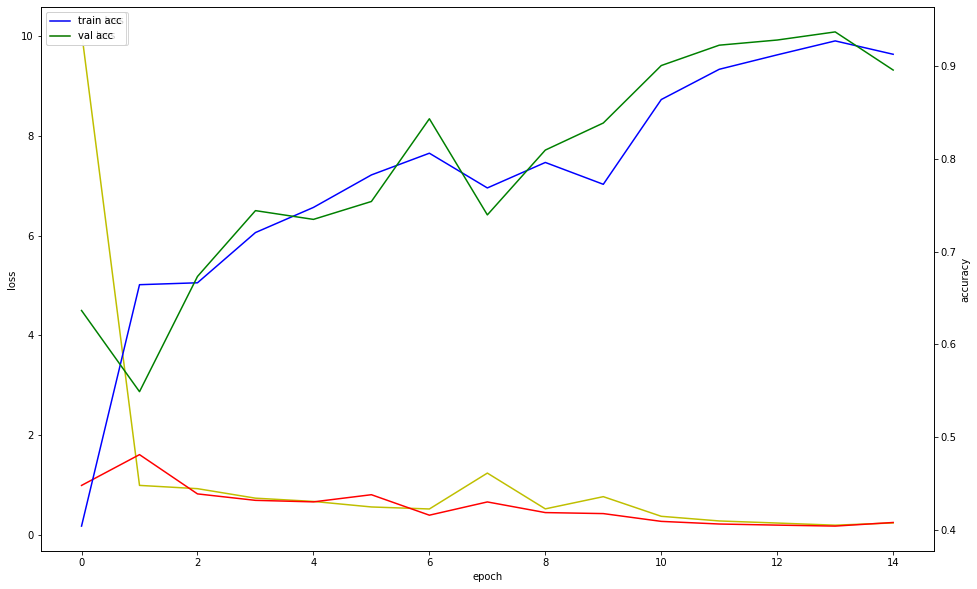

In [19]:
fig, loss_ax = plt.subplots(figsize=(16, 10))
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['acc'], 'b', label='train acc')
acc_ax.plot(history.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()

In [20]:
model = load_model('models/model.h5')

In [21]:
y_pred = model.predict(x_val)

225/225 [==============================] - 2s 6ms/step


In [22]:
multilabel_confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))

array([[[6285,    2],
        [   5,  902]],

       [[6152,  112],
        [  34,  896]],

       [[6279,    5],
        [  15,  895]],

       [[6082,  161],
        [ 108,  843]],

       [[6260,   10],
        [   8,  916]],

       [[6464,   11],
        [   0,  719]],

       [[6199,   93],
        [   5,  897]],

       [[6185,   58],
        [ 277,  674]]], dtype=int64)